<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1-new-room-on-airbnb-dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost -U -q
!pip install sklearn -U -q

     |████████████████████████████████| 255.9 MB 45 kB/s 


In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.3.5'

Inputs:

New room
- where?
- how many beds?
- min. nights

Outputs:

Suggeted price-range

## Open Dataset + some EDA + Filtering

In [ ]:
data = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-06-24/data/listings.csv.gz')

In [ ]:
data['price'] = data.price.str.replace('$','')
data['price'] = data.price.str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
data['price'] = data['price'].astype('float')

In [ ]:
mapping = {'f':False,'t':True}
data.replace({"instant_bookable":mapping}, inplace=True)

In [ ]:
data = data[data.room_type.isin(['Private room', 'Entire home/apt'])]

In [ ]:
data['price_z'] = (data['price'] - data['price'].mean())/data['price'].std(ddof=0)
data['price_z'] = data['price_z'].abs()
data = data[data.price_z < 2]

In [ ]:
data = data[data.number_of_reviews_l30d >= 1]

In [ ]:
data = data[data.review_scores_rating >= 4]

## Feature Engineering

- Selecting features
- creating dummies
- binning
- scaling

In [ ]:
selected_df = data[['neighbourhood_cleansed','room_type','instant_bookable','accommodates','bedrooms','beds','minimum_nights_avg_ntm','price']]

In [ ]:
selected_df = selected_df.dropna()
#selected_df = selected_df.dropna(subset=['bedrooms','beds'])

In [ ]:
X = selected_df.iloc[:,:-1]

In [ ]:
y = selected_df.price

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import itertools

In [ ]:
ohe_X = OneHotEncoder(sparse=False)

In [ ]:
X_ohe = ohe_X.fit_transform(X.iloc[:,:2]) 

In [ ]:
columns_X_ohe = list(itertools.chain(*ohe_X.categories_))

In [ ]:
X_cat = pd.DataFrame(X_ohe, columns = columns_X_ohe)

In [ ]:
X_cat

,Amager Vest,Amager st,Bispebjerg,Brnshj-Husum,Frederiksberg,Indre By,Nrrebro,Valby,Vanlse,Vesterbro-Kongens Enghave,sterbro,Entire home/apt,Private room
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
transformed_nummerical = scaler.fit_transform(X.iloc[:,2:])

In [ ]:
X.iloc[:,2:] = transformed_nummerical

In [ ]:
X

,neighbourhood_cleansed,room_type,instant_bookable,accommodates,bedrooms,beds,minimum_nights_avg_ntm
0,Nrrebro,Entire home/apt,-0.506681,-0.738065,-0.625227,-0.689055,-0.027534
10,Nrrebro,Entire home/apt,-0.506681,1.617060,0.577156,2.382479,0.841476
12,Indre By,Entire home/apt,-0.506681,1.617060,1.779539,0.846712,-0.027534
21,Amager Vest,Entire home/apt,-0.506681,0.439498,0.577156,1.614595,-0.256222
22,Brnshj-Husum,Private room,-0.506681,-0.738065,-0.625227,0.078828,-0.027534
...,...,...,...,...,...,...,...
12484,Valby,Entire home/apt,-0.506681,0.439498,0.577156,1.614595,-0.484909
12486,sterbro,Entire home/apt,-0.506681,0.439498,1.779539,0.846712,-0.027534
12488,Bispebjerg,Entire home/apt,-0.506681,-0.738065,-0.625227,-0.689055,-0.416303
12489,Bispebjerg,Entire home/apt,-0.506681,0.439498,0.577156,0.078828,-0.256222


In [ ]:
X.index = range(len(X))
X_cat.index = range(len(X_cat))

In [ ]:
X_enc = X.iloc[:,2:].join(X_cat)

## Splittng and preparing for ML



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2)

## Pick model and train it + iterate

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model_xgb = XGBRegressor()

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

Model XGB 0.7474002925478183


In [ ]:
y_pred_train = model_xgb.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred_train, squared=False)

342.0963834485481

## Evaluation

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

561.5989233779409

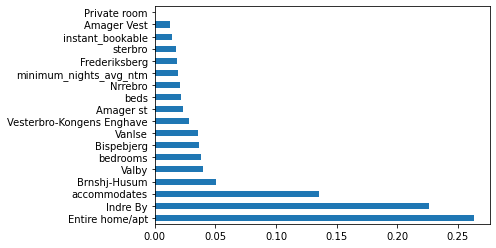

In [ ]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X_enc.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model_xgb)

In [ ]:
shap_values = explainer.shap_values(X_enc)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


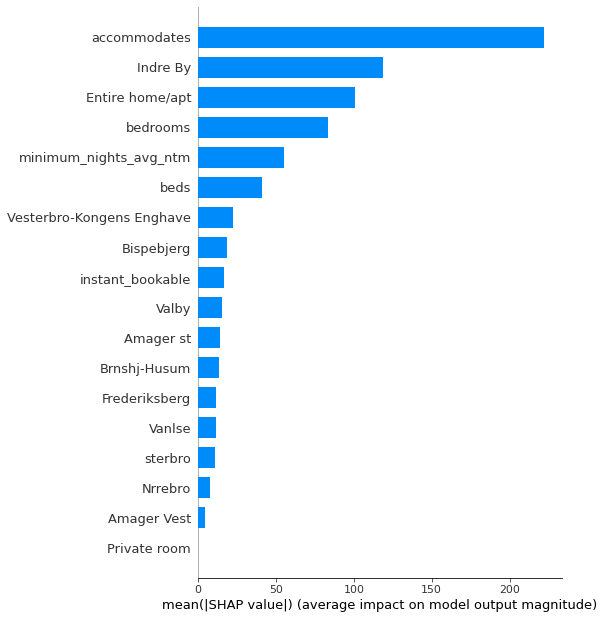

In [ ]:
shap.summary_plot(shap_values, X_enc, plot_type="bar")

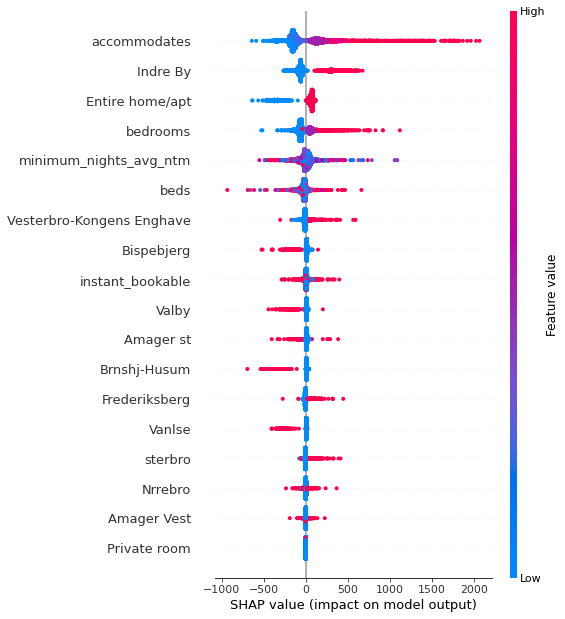

In [ ]:
shap.summary_plot(shap_values, X_enc)

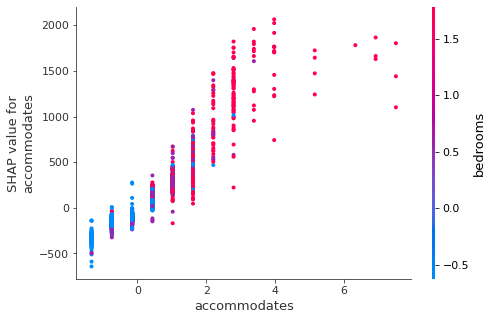

In [ ]:
shap.dependence_plot("accommodates", shap_values, X_enc)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_enc.iloc[1,:])

In [ ]:
import pickle

In [ ]:
selected_df.iloc[3,:]

neighbourhood_cleansed        Amager Vest
room_type                 Entire home/apt
instant_bookable                    False
accommodates                            4
bedrooms                              2.0
beds                                  4.0
minimum_nights_avg_ntm                2.0
price                              2000.0
Name: 21, dtype: object

In [ ]:
X_test.iloc[3,:]

instant_bookable            -0.506681
accommodates                 0.439498
bedrooms                     0.577156
beds                         0.846712
minimum_nights_avg_ntm      -0.256222
Amager Vest                  0.000000
Amager st                    0.000000
Bispebjerg                   0.000000
Brnshj-Husum                 0.000000
Frederiksberg                1.000000
Indre By                     0.000000
Nrrebro                      0.000000
Valby                        0.000000
Vanlse                       0.000000
Vesterbro-Kongens Enghave    0.000000
sterbro                      0.000000
Entire home/apt              1.000000
Private room                 0.000000
Name: 389, dtype: float64

In [ ]:
model_xgb.save_model('model_xgb.json')

In [ ]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [ ]:
pickle.dump(ohe_X, open('ohe.pkl','wb'))

In [ ]:
X.to_json('X.json')
selected_df.to_json('selected_df.json')

In [ ]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))

In [ ]:
pickle.dump(shap_values, open('shap_values.pkl','wb'))